# EDA on eBay Tech Deals
This notebook performs exploratory data analysis on `cleaned_ebay_deals.csv`.

## 1. Setup & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# display options
pd.set_option("display.max_columns", None)

df = pd.read_csv("cleaned_ebay_deals.csv")

df.head()

,timestamp,title,price,original_price,item_url,discount_percentage
0,2025-11-02 20:15:13,Soundcore Life Q20 Wireless Over-Ear Headphone...,29.99,59.99,https://www.ebay.com/itm/384235550388,50.01
1,2025-11-02 20:15:13,Apple iPhone 14 128GB Unlocked - Excellent,310.95,310.95,https://www.ebay.com/itm/364506177072,0.00
2,2025-11-02 20:15:13,Lenovo Legion 5 15.1 OLED WQXGA 165HZ Gaming N...,999.99,1399.99,https://www.ebay.com/itm/127210724599,28.57
3,2025-11-02 20:15:13,Samsung Galaxy Buds FE True Wireless Bluetooth...,40.05,40.05,https://www.ebay.com/itm/285820041847,0.00
4,2025-11-02 20:15:13,Apple Watch Series 5 40mm 44mm GPS + WiFi + Ce...,84.99,84.99,https://www.ebay.com/itm/313943952880,0.00


## 2. Time Series Analysis

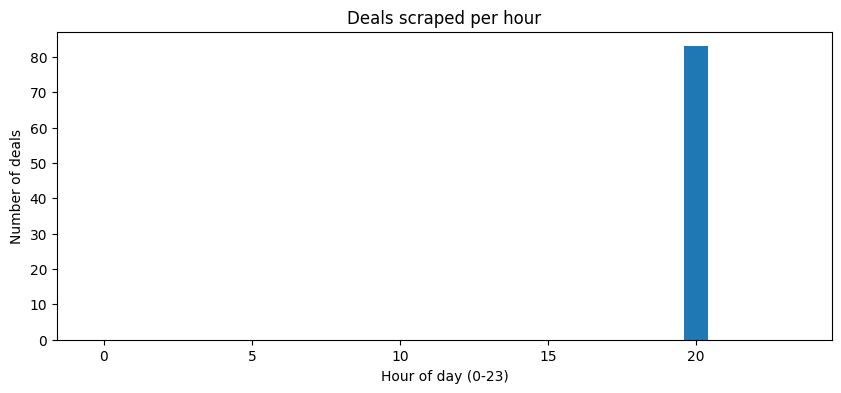

In [2]:
# convert timestamp to datetime and sort
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.sort_values("timestamp")

# extract hour
df["hour"] = df["timestamp"].dt.hour

deals_per_hour = df.groupby("hour")["title"].count().reindex(range(24), fill_value=0)

plt.figure(figsize=(10,4))
plt.bar(deals_per_hour.index, deals_per_hour.values)
plt.xlabel("Hour of day (0-23)")
plt.ylabel("Number of deals")
plt.title("Deals scraped per hour")
plt.show()

## 3. Price and Discount Analysis

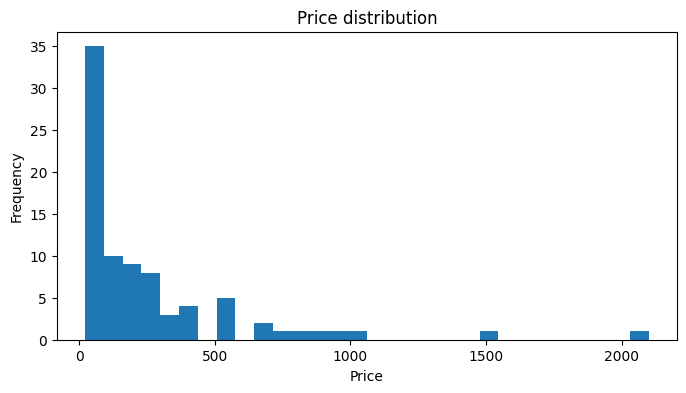

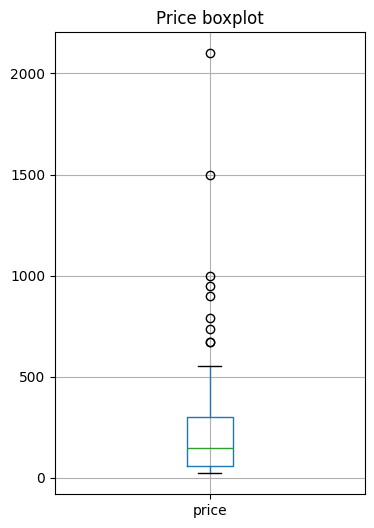

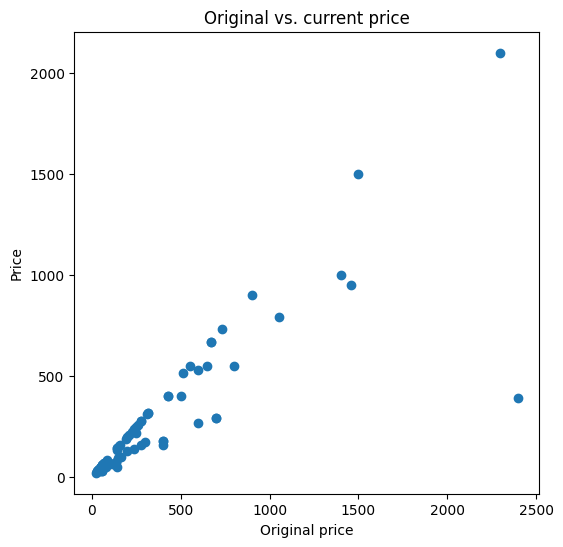

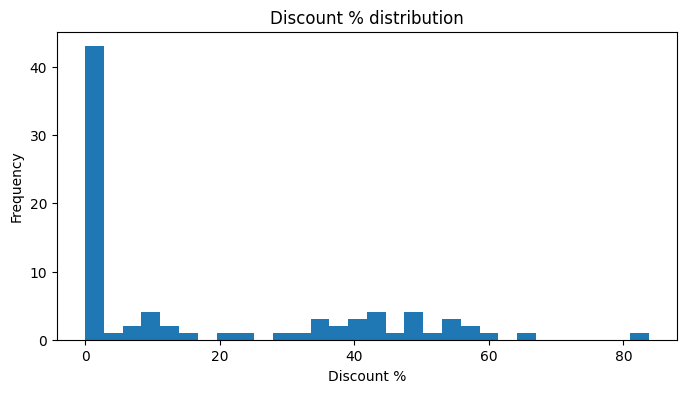

In [3]:
# histogram of prices
plt.figure(figsize=(8,4))
df["price"].plot(kind="hist", bins=30)
plt.title("Price distribution")
plt.xlabel("Price")
plt.show()

# boxplot of prices
plt.figure(figsize=(4,6))
df[["price"]].boxplot()
plt.title("Price boxplot")
plt.show()

# scatter: original vs price
plt.figure(figsize=(6,6))
plt.scatter(df["original_price"], df["price"])
plt.xlabel("Original price")
plt.ylabel("Price")
plt.title("Original vs. current price")
plt.show()

# discount percentage distribution
plt.figure(figsize=(8,4))
df["discount_percentage"].dropna().plot(kind="hist", bins=30)
plt.title("Discount % distribution")
plt.xlabel("Discount %")
plt.show()

## 4. Text Analysis on Product Titles

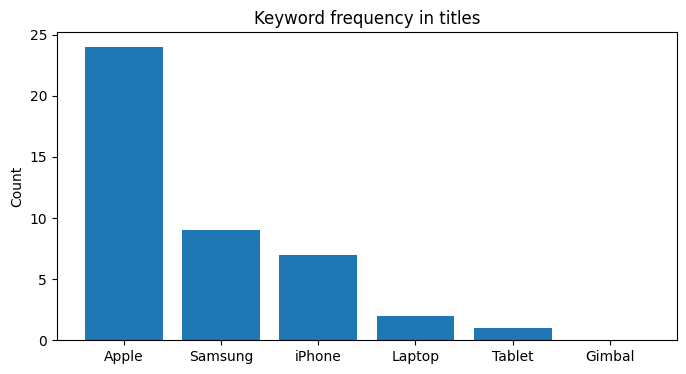

,keyword,count
0,Apple,24
1,Samsung,9
3,iPhone,7
2,Laptop,2
4,Tablet,1
5,Gimbal,0


In [4]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

title_series = df["title"].fillna("").str.lower()

keyword_counts = {}
for kw in keywords:
    keyword_counts[kw] = title_series.str.contains(kw.lower()).sum()

kw_df = pd.DataFrame({
    "keyword": list(keyword_counts.keys()),
    "count": list(keyword_counts.values())
}).sort_values("count", ascending=False)

plt.figure(figsize=(8,4))
plt.bar(kw_df["keyword"], kw_df["count"])
plt.title("Keyword frequency in titles")
plt.ylabel("Count")
plt.show()

kw_df

## 5. Price Difference Analysis

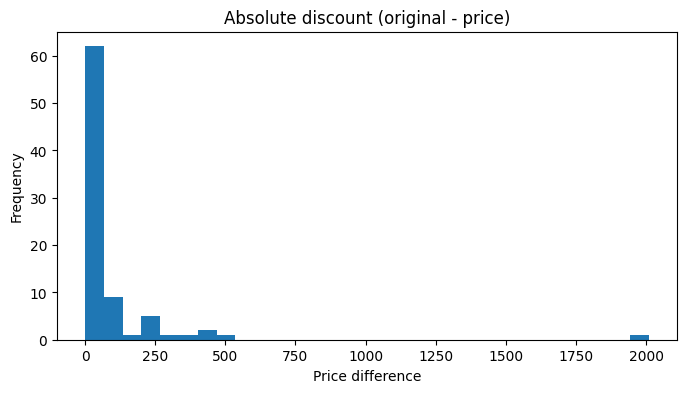

In [5]:
df["abs_discount"] = df["original_price"] - df["price"]

plt.figure(figsize=(8,4))
df["abs_discount"].dropna().plot(kind="hist", bins=30)
plt.title("Absolute discount (original - price)")
plt.xlabel("Price difference")
plt.show()

## 6. Top 5 Deals by Discount Percentage

In [6]:
top5 = df.sort_values("discount_percentage", ascending=False).head(5)
top5[["timestamp", "title", "price", "original_price", "discount_percentage"]]

,timestamp,title,price,original_price,discount_percentage
25,2025-11-02 20:15:14,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",389.67,2399.00,83.76
14,2025-11-02 20:15:13,"Proscan 10.1"" Tablet/Portable DVD Combo 2GB/32...",49.99,139.99,64.29
42,2025-11-02 20:15:14,"Apple iPad 10.2"" 9th Gen, 64GB, Wi-Fi - Gray -...",156.26,399.00,60.84
40,2025-11-02 20:15:14,"Apple iPad Air 10.9"" 4th Gen, 256GB, Wi-Fi - B...",289.85,699.00,58.53
39,2025-11-02 20:15:14,"Apple iPad Air 10.9"" 4th Gen, 256GB, Wi-Fi - G...",289.85,699.00,58.53
